In [1]:
%matplotlib inline

import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.rcParams['font.size'] = 6
plt.rcParams['figure.figsize'] = (6,6)

from collections import Counter

import pandas as pd
import numpy as np

from keras.models import load_model

from keras.preprocessing.image import array_to_img, img_to_array, load_img
from scipy.misc import imresize

from PIL import Image

/home/zh/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
ratings = pd.read_excel('SCUT-FBP5500_with_Landmarks/All_Ratings.xlsx')

filenames = ratings.groupby('Filename').size().index.tolist()

labels = []

for filename in filenames:
    df = ratings[ratings['Filename'] == filename]
    score = round(df['Rating'].mean(), 2)
    labels.append({'Filename': filename, 'score': score})

labels_df = pd.DataFrame(labels)
labels_df.head()

,Filename,score
0,ftw1.jpg,4.12
1,ftw10.jpg,3.55
2,ftw100.jpg,2.13
3,ftw101.jpg,2.48
4,ftw102.jpg,3.30


In [8]:
df = labels_df[labels_df.score >= 4]

/home/zh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
img_height, img_width, channels = 350, 350, 3

(-0.5, 349.5, 349.5, -0.5)

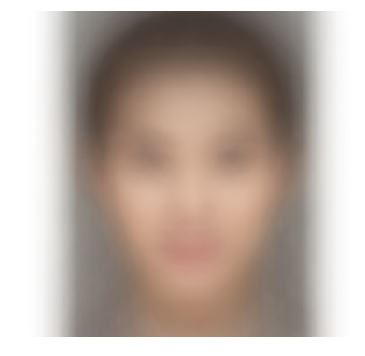

In [19]:
imlist = df.Filename.tolist()
N = len(imlist)
arr = np.zeros((img_height, img_width, channels), np.float)
    
for im in imlist:
    imarr = np.array(Image.open("SCUT-FBP5500_with_Landmarks/Images/"+im), dtype=np.float)
    arr = arr + imarr / N

arr = np.array(np.round(arr), dtype=np.uint8)
image = Image.fromarray(arr, mode="RGB")
plt.imshow(image)
plt.axis('off')

In [15]:
model = load_model('06-0.15.h5')

In [20]:
test_x = img_to_array(image).reshape(img_height, img_width, channels)
test_x = test_x / 255.
test_x = test_x.reshape((1,) + test_x.shape)
predicted = model.predict(test_x)
print("predicted: %.2f" % predicted[0][0])

predicted: 2.92


/home/zh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


predicted: 4.04


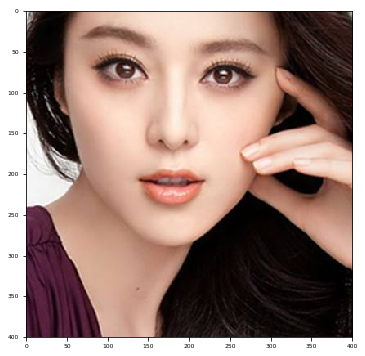

In [17]:
plt.rcParams['font.size'] = 6
plt.rcParams['figure.figsize'] = (6,6)

img = load_img('fbb.jpeg')
plt.imshow(img)
img = imresize(img, size=(img_height, img_width))
test_x = img_to_array(img).reshape(img_height, img_width, channels)
test_x = test_x / 255.
test_x = test_x.reshape((1,) + test_x.shape)
predicted = model.predict(test_x)
print("predicted: %.2f" % predicted[0][0])

predicted: 2.07


/home/zh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


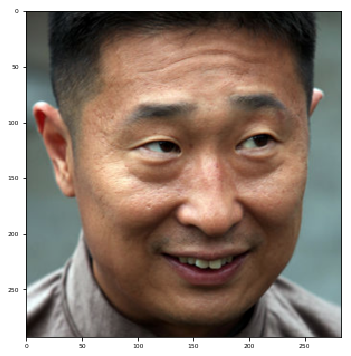

In [21]:
img = load_img('lyj.png')
plt.imshow(img)
img = imresize(img, size=(img_height, img_width))
test_x = img_to_array(img).reshape(img_height, img_width, channels)
test_x = test_x / 255.
test_x = test_x.reshape((1,) + test_x.shape)
predicted = model.predict(test_x)
print("predicted: %.2f" % predicted[0][0])